In [1]:
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

In [2]:
session = fastf1.get_session(2024, "Singapore", 'R')
session.load()
laps = session.laps

req         WARNING 	DEFAULT CACHE ENABLED! (112.59 MB) C:\Users\righi\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Singapore Grand Prix - Race [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '81', '63', '16', '44', '55', '14', '27', '11', '43', '22', '31', '18

In [3]:
drivers = session.drivers
print(drivers)

['4', '1', '81', '63', '16', '44', '55', '14', '27', '11', '43', '22', '31', '18', '24', '77', '10', '3', '20', '23']


In [4]:
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

['NOR', 'VER', 'PIA', 'RUS', 'LEC', 'HAM', 'SAI', 'ALO', 'HUL', 'PER', 'COL', 'TSU', 'OCO', 'STR', 'ZHO', 'BOT', 'GAS', 'RIC', 'MAG', 'ALB']


In [5]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

In [6]:
stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

   Driver  Stint Compound  StintLength
0     ALB    1.0   MEDIUM           11
1     ALB    2.0     HARD            4
2     ALO    1.0   MEDIUM           25
3     ALO    2.0     HARD           36
4     BOT    1.0     HARD           33
5     BOT    2.0   MEDIUM           28
6     COL    1.0   MEDIUM           29
7     COL    2.0     HARD           32
8     GAS    1.0   MEDIUM           37
9     GAS    2.0     SOFT           24
10    HAM    1.0     SOFT           17
11    HAM    2.0     HARD           45
12    HUL    1.0   MEDIUM           29
13    HUL    2.0     HARD           32
14    LEC    1.0   MEDIUM           36
15    LEC    2.0     HARD           26
16    MAG    1.0     HARD           28
17    MAG    2.0   MEDIUM           21
18    MAG    3.0     SOFT            8
19    NOR    1.0   MEDIUM           30
20    NOR    2.0     HARD           32
21    OCO    1.0   MEDIUM           29
22    OCO    2.0     HARD           32
23    PER    1.0   MEDIUM           28
24    PER    2.0     HARD

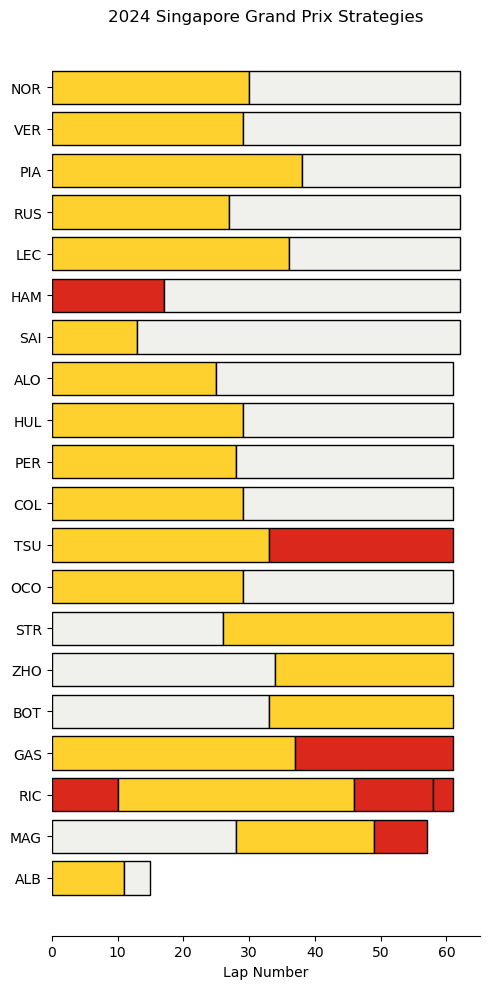

In [15]:
fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

plt.title("2024 Singapore Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()